In [66]:
import numpy as np
import matplotlib.pyplot as plt

In [1]:
from dataset import download_cifar10_dataset
dataset = download_cifar10_dataset()

Dataset Downloading ...
Downloaded CIFAR-10 dataset to  /Users/deepthireddy/Desktop/Winter 2024/CSE 251u/Assignment 2/cifar-representations/datasets


In [103]:
from dataset import load_dataset_splits
x_train, y_train, x_test, y_test = load_dataset_splits()

======> CIFAR-10 dataset loaded
Training set data shape:  (50000, 3, 32, 32)
Training set label shape:  (50000,)
Test set data shape:  (10000, 3, 32, 32)
Test set label shape:  (10000,)


In [104]:
rotated_images_test = np.array(list(map(lambda i: x_test[i].reshape(3,32,32).transpose(1,2,0), range(10000))))
rotated_images_train = np.array(list(map(lambda i: x_train[i].reshape(3,32,32).transpose(1,2,0), range(50000))))

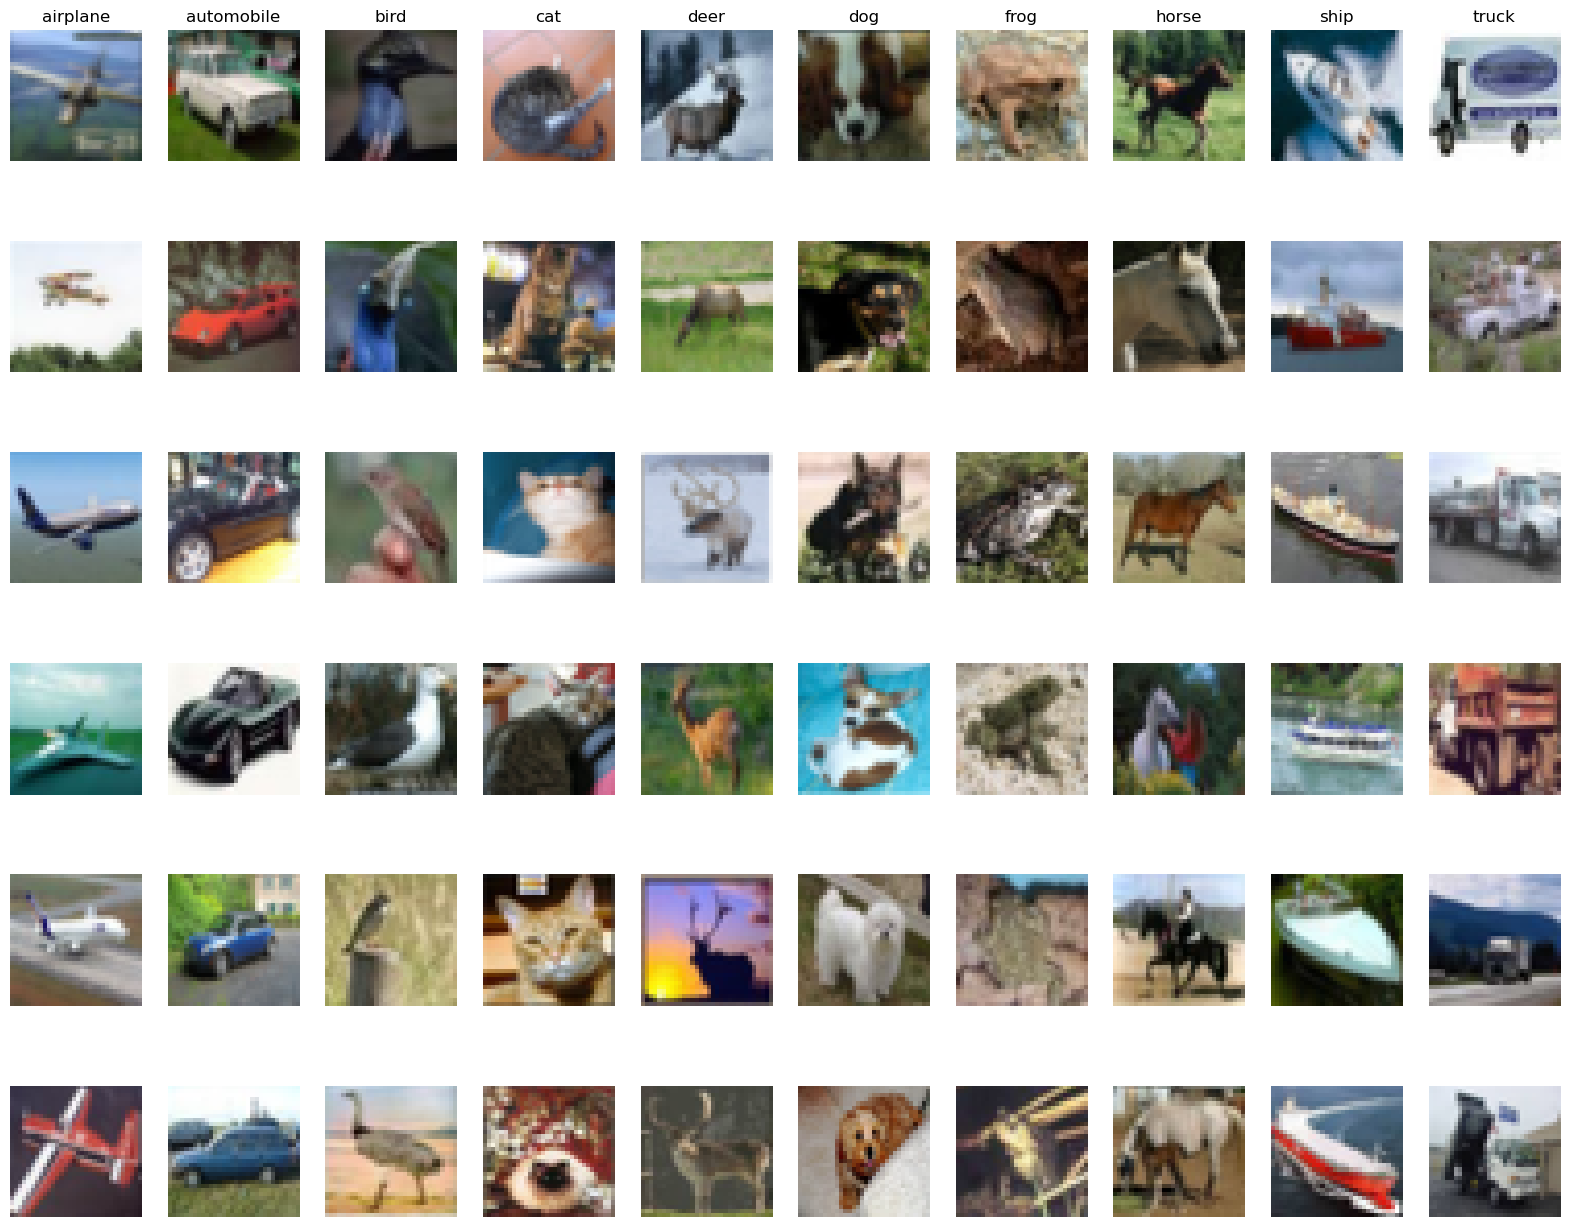

In [105]:
from dataset import visualize_cifar_data
visualize_cifar_data(images=x_train.transpose(0, 2, 3, 1), labels=y_train, samples_per_class=6)

### Nearest neighbor classification on CIFAR-10


In [106]:
from sklearn.neighbors import KNeighborsClassifier

def run_nearest_neighbor(x_train, y_train, x_test, y_test):
    # create classifier
    nn_classifier = KNeighborsClassifier(n_neighbors=1, algorithm='auto')
    
    # train 
    nn_classifier.fit(x_train, y_train)

    # test and report accuracy
    test_acc = nn_classifier.score(x_test, y_test)
    print("Nearest neighbor accuracy on the test set: %f"%test_acc)
    
    return nn_classifier

In [107]:
from extract_feature import compute_or_load_features

# compute or load features
raw_pixel_train_features, raw_pixel_test_features = compute_or_load_features(x_train, x_test, "raw_pixel")

# run knn
raw_pixel_knn_classifier = run_nearest_neighbor(raw_pixel_train_features, y_train, raw_pixel_test_features, y_test)

======> Loaded train and test features from  /Users/deepthireddy/Desktop/Winter 2024/CSE 251u/Assignment 2/cifar-representations/features/raw_pixel.pkl
Training feature shape:  (50000, 3072)
Test feature shape:  (10000, 3072)
Nearest neighbor accuracy on the test set: 0.353900


In [8]:
#!pip3 install torch torchvision torchaudio

In [108]:
preds = raw_pixel_knn_classifier.predict(raw_pixel_test_features)
correct = []
incorrect = []
for i in range(len(preds)):
    if(y_test[i]==preds[i] and len(correct)<5):
        correct.append(i)
    elif(y_test[i]!=preds[i] and len(incorrect)<5):
        incorrect.append(i)
    elif(len(correct)==5 and len(incorrect)==5):
        break
nc = raw_pixel_knn_classifier.kneighbors([raw_pixel_test_features[i] for i in correct],n_neighbors=1, return_distance=False)
nic = raw_pixel_knn_classifier.kneighbors([raw_pixel_test_features[i] for i in incorrect],n_neighbors=1, return_distance=False)
nncorrect = [i[0] for i in list(nc)]
nnincorrect = [i[0] for i in list(nic)]

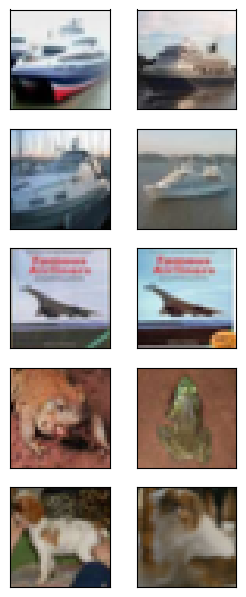

In [109]:
fig = plt.figure(0)
fig.set_size_inches(3, 7.5)
for i in range(0,5):
    fig.add_subplot(5, 2, 2*i+1)
    plt.imshow(rotated_images_test[correct[i]])
    plt.xticks([])
    plt.yticks([])
    fig.add_subplot(5, 2, 2*i+2)
    plt.imshow(rotated_images_train[nncorrect[i]])
    plt.xticks([])
    plt.yticks([])
    #plt.title("Label: {}".format(y_test[correct[i]]))

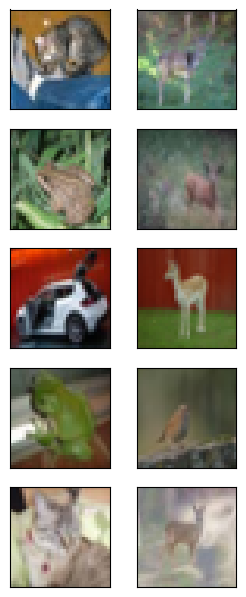

In [110]:
fig = plt.figure(0)
fig.set_size_inches(3, 7.5)
for i in range(0,5):
    fig.add_subplot(5, 2, 2*i+1)
    plt.imshow(rotated_images_test[incorrect[i]])
    plt.xticks([])
    plt.yticks([])
    fig.add_subplot(5, 2, 2*i+2)
    plt.imshow(rotated_images_train[nnincorrect[i]])
    plt.xticks([])
    plt.yticks([])
    #plt.title("Label: {}".format(y_test[correct[i]]))

### Nearest neighbor on HOG features 

In [111]:
from extract_feature import compute_or_load_features

# compute or load features
hog_train_features, hog_test_features = compute_or_load_features(x_train, x_test, "hog")
    
# run knn
hog_knn_classifier = run_nearest_neighbor(hog_train_features, y_train, hog_test_features, y_test)

======> Loaded train and test features from  /Users/deepthireddy/Desktop/Winter 2024/CSE 251u/Assignment 2/cifar-representations/features/hog.pkl
Training feature shape:  (50000, 512)
Test feature shape:  (10000, 512)
Nearest neighbor accuracy on the test set: 0.365700


In [112]:
preds = hog_knn_classifier.predict(hog_test_features)
correct = []
incorrect = []
for i in range(len(preds)):
    if(y_test[i]==preds[i] and len(correct)<5):
        correct.append(i)
    elif(y_test[i]!=preds[i] and len(incorrect)<5):
        incorrect.append(i)
    elif(len(correct)==5 and len(incorrect)==5):
        break
nc = hog_knn_classifier.kneighbors([hog_test_features[i] for i in correct],n_neighbors=1, return_distance=False)
nic = hog_knn_classifier.kneighbors([hog_test_features[i] for i in incorrect],n_neighbors=1, return_distance=False)
nncorrect = [i[0] for i in list(nc)]
nnincorrect = [i[0] for i in list(nic)]

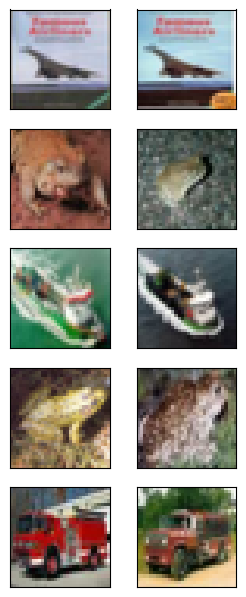

In [113]:
fig = plt.figure(0)
fig.set_size_inches(3, 7.5)
for i in range(0,5):
    fig.add_subplot(5, 2, 2*i+1)
    plt.imshow(rotated_images_test[correct[i]])
    plt.xticks([])
    plt.yticks([])
    fig.add_subplot(5, 2, 2*i+2)
    plt.imshow(rotated_images_train[nncorrect[i]])
    plt.xticks([])
    plt.yticks([])
    #plt.title("Label: {}".format(y_test[correct[i]]))

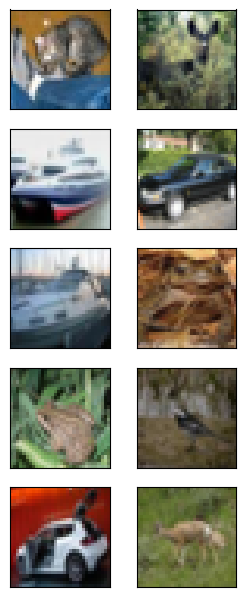

In [114]:
fig = plt.figure(0)
fig.set_size_inches(3, 7.5)
for i in range(0,5):
    fig.add_subplot(5, 2, 2*i+1)
    plt.imshow(rotated_images_test[incorrect[i]])
    plt.xticks([])
    plt.yticks([])
    fig.add_subplot(5, 2, 2*i+2)
    plt.imshow(rotated_images_train[nnincorrect[i]])
    plt.xticks([])
    plt.yticks([])
    #plt.title("Label: {}".format(y_test[correct[i]]))

### Nearest neighbor on CNN features

In [115]:
from torchinfo import summary
from vgg_network import vgg11_bn

vgg_model = vgg11_bn(pretrained=False)
summary(vgg_model, input_size=(16, 3, 32, 32))

Layer (type:depth-idx)                   Output Shape              Param #
VGG                                      [16, 10]                  --
├─Sequential: 1-1                        [16, 512, 1, 1]           --
│    └─Conv2d: 2-1                       [16, 64, 32, 32]          1,792
│    └─BatchNorm2d: 2-2                  [16, 64, 32, 32]          128
│    └─ReLU: 2-3                         [16, 64, 32, 32]          --
│    └─MaxPool2d: 2-4                    [16, 64, 16, 16]          --
│    └─Conv2d: 2-5                       [16, 128, 16, 16]         73,856
│    └─BatchNorm2d: 2-6                  [16, 128, 16, 16]         256
│    └─ReLU: 2-7                         [16, 128, 16, 16]         --
│    └─MaxPool2d: 2-8                    [16, 128, 8, 8]           --
│    └─Conv2d: 2-9                       [16, 256, 8, 8]           295,168
│    └─BatchNorm2d: 2-10                 [16, 256, 8, 8]           512
│    └─ReLU: 2-11                        [16, 256, 8, 8]           --


In [116]:
#!pip3 install torchinfo

### Nearest neighbor on pretrained CNN features

In [117]:
from extract_feature import compute_or_load_features

# compute or load features
pretrained_cnn_last_conv_train_features, pretrained_cnn_last_conv_test_features = compute_or_load_features(x_train, x_test, "pretrained_cnn", "last_conv")

# run knn
pretrained_cnn_last_conv_knn_classifier = run_nearest_neighbor(pretrained_cnn_last_conv_train_features, y_train, pretrained_cnn_last_conv_test_features, y_test)

======> Loaded train and test features from  /Users/deepthireddy/Desktop/Winter 2024/CSE 251u/Assignment 2/cifar-representations/features/pretrained_cnn_last_conv.pkl
Training feature shape:  (50000, 512)
Test feature shape:  (10000, 512)
Nearest neighbor accuracy on the test set: 0.920000


In [118]:
from extract_feature import compute_or_load_features

# compute or load features
pretrained_cnn_last_fc_train_features, pretrained_cnn_last_fc_test_features = compute_or_load_features(x_train, x_test, "pretrained_cnn", "last_fc")

# run knn
pretrained_cnn_last_fc_knn_classifier = run_nearest_neighbor(pretrained_cnn_last_fc_train_features, y_train, pretrained_cnn_last_fc_test_features, y_test)

======> Loaded train and test features from  /Users/deepthireddy/Desktop/Winter 2024/CSE 251u/Assignment 2/cifar-representations/features/pretrained_cnn_last_fc.pkl
Training feature shape:  (50000, 4096)
Test feature shape:  (10000, 4096)
Nearest neighbor accuracy on the test set: 0.920700


In [119]:
preds = pretrained_cnn_last_fc_knn_classifier.predict(pretrained_cnn_last_fc_test_features)
correct = []
incorrect = []
for i in range(len(preds)):
    if(y_test[i]==preds[i] and len(correct)<5):
        correct.append(i)
    elif(y_test[i]!=preds[i] and len(incorrect)<5):
        incorrect.append(i)
    elif(len(correct)==5 and len(incorrect)==5):
        break
nc = pretrained_cnn_last_fc_knn_classifier.kneighbors([pretrained_cnn_last_fc_test_features[i] for i in correct],n_neighbors=1, return_distance=False)
nic = pretrained_cnn_last_fc_knn_classifier.kneighbors([pretrained_cnn_last_fc_test_features[i] for i in incorrect],n_neighbors=1, return_distance=False)
nncorrect = [i[0] for i in list(nc)]
nnincorrect = [i[0] for i in list(nic)]

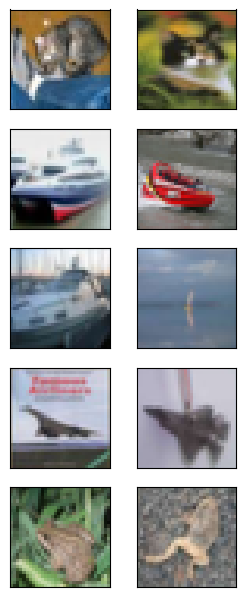

In [120]:
fig = plt.figure(0)
fig.set_size_inches(3, 7.5)
for i in range(0,5):
    fig.add_subplot(5, 2, 2*i+1)
    plt.imshow(rotated_images_test[correct[i]])
    plt.xticks([])
    plt.yticks([])
    fig.add_subplot(5, 2, 2*i+2)
    plt.imshow(rotated_images_train[nncorrect[i]])
    plt.xticks([])
    plt.yticks([])
    #plt.title("Label: {}".format(y_test[correct[i]]))

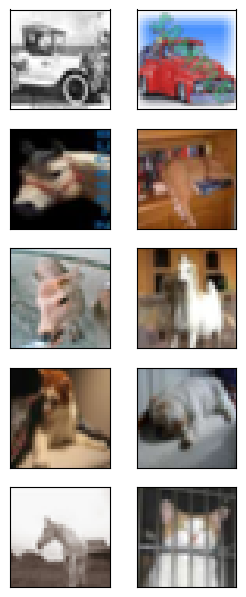

In [121]:
fig = plt.figure(0)
fig.set_size_inches(3, 7.5)
for i in range(0,5):
    fig.add_subplot(5, 2, 2*i+1)
    plt.imshow(rotated_images_test[incorrect[i]])
    plt.xticks([])
    plt.yticks([])
    fig.add_subplot(5, 2, 2*i+2)
    plt.imshow(rotated_images_train[nnincorrect[i]])
    plt.xticks([])
    plt.yticks([])
    #plt.title("Label: {}".format(y_test[correct[i]]))

### Alignment between nearest neighbor classifier and pretrained CNN model

In [122]:
from vgg_network import test_pretrained_vgg

test_acc = test_pretrained_vgg(x_test, y_test)
print('Accuracy on the test images: ', test_acc) 

Accuracy on the test images:  0.9225


### Nearest neighbor on random CNN features

In [123]:
from extract_feature import compute_or_load_features

# compute or load features
random_cnn_last_conv_train_features, random_cnn_last_conv_test_features = compute_or_load_features(x_train, x_test, "random_cnn", "last_conv")

# run knn
random_cnn_last_conv_knn_classifier = run_nearest_neighbor(random_cnn_last_conv_train_features, y_train, random_cnn_last_conv_test_features, y_test)

======> Loaded train and test features from  /Users/deepthireddy/Desktop/Winter 2024/CSE 251u/Assignment 2/cifar-representations/features/random_cnn_last_conv.pkl
Training feature shape:  (50000, 512)
Test feature shape:  (10000, 512)
Nearest neighbor accuracy on the test set: 0.402900


In [124]:
from extract_feature import compute_or_load_features

# compute or load features
random_cnn_last_fc_train_features, random_cnn_last_fc_test_features = compute_or_load_features(x_train, x_test, "random_cnn", "last_fc")

# run knn
random_cnn_last_fc_knn_classifier = run_nearest_neighbor(random_cnn_last_fc_train_features, y_train, random_cnn_last_fc_test_features, y_test)

======> Loaded train and test features from  /Users/deepthireddy/Desktop/Winter 2024/CSE 251u/Assignment 2/cifar-representations/features/random_cnn_last_fc.pkl
Training feature shape:  (50000, 4096)
Test feature shape:  (10000, 4096)
Nearest neighbor accuracy on the test set: 0.400100


## References
1. D. Ulyanov, A. Vedaldi, and V. Lempitsky, [Deep Image Prior](https://arxiv.org/pdf/1711.10925.pdf), CVPR 2018.
2. M. Zeiler and R. Fergus, [Visualizing and Understanding Deep Neural Networks](https://arxiv.org/pdf/1311.2901.pdf), ECCV 2014.  